# Customers Segmentation for Marketing | RFM Modeling

***

In this project, we create a customer segmentation for marketing using a RFM model in python. To perform the segmentation, we calculate and score each customer based on how recent they made their last purchase, how often they make a purchase and how much they have spent in purchase since they first order. Using these scores we are able to identify the most valuable customers and the customers at risk of churning.

## Project Summary
***

## Context
***
The data set contains all the transactions for a UK-based online retail company from 01/12/2010 to 09/12/2011. The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

> The retail company wants to rank and group their customers. They want to identify the most valuable customers and the customers at risk of churning. We will perform the segmentation by using the RFM Model.

RFM (recency, frequency, monetary) analysis is a marketing approach that is used to quantitatively evaluate and group clients based on the recency, frequency and monetary of their most recent transactions in order to pinpoint the best customers and execute focused marketing campaigns. In order to provide an objective analysis, the system gives each consumer a numerical score based on these variables. These scores ranges from 1 to 5. Below are the details of the variables.

**Recency:** What was the customer's most recent purchase? Customers who have recently made a purchase are more likely to make another buy or use the product since they are still thinking about it. This factor is usually measured in days.

**Frequency:** How frequently did this customer buy throughout a certain period of time? Customers who have previously made a purchase are more likely to do so again. In order to turn first-time clients into loyal customers, follow-up advertising may make them a great target.

**Monetary:** How much did the customer spend over a given timeframe? Customers that spend a lot of money are more likely to make additional purchases in the future and are valuable to a company.

RFM analysis is a powerful tool in marketing that helps marketers make the best of their advertising budget. It enables businesses to use a targeted marketing campaigns which a specific group of customers are more likely to respond to.

## Actions
***
The data contains severals columns which includes the *invoice number, stock code, description, quantity, invoice date, unit price, customer id and country*. We dropped all records with missing *customer ID* and filter out all cancelled transactions. From the data description, we observed that some transactions have a unit price of 0. This could be items purchased through promotions such as *buy 1 get 1 free* or it could be a data entry error. Since we have only 40 transactions with such issues, we will exclude them from this analysis.

We grouped the transactions by customers to help us compute the **Recency**, the **Frequency**, and the **Monetary** values. We then computed scores for the RFM variables of each customer. These scores ranks each customer from 1 to 5 where 5 is the highest rank and 1 is the lowest.

We finally computed the RFM values by summing the scores of Recency, Frequency and Monetary. We then computed the RFM score by ranking the RFM values. We will assign a customer to a segment based on their RFM score. The segments are made up of *Bronze Customers*, *Silver Customers*, *Gold Customers*, *Platinum Customers*, and *Diamond Customers*. A RFM score of 0 corresponds to a *Bronze Customer* and RFM score of 5 corresponds to a *Diamond Customer*.

## Result
***
![CustomersSegments](./img/segments.png)

Our most valuable customers, **Diamond Customers**, makes up **7%** of our entire customers base. On average, they have purchased 489 times and spent 13,665 USD on average in this evaluate period. Our customers who are at risk of churning, **Bronze Customers**, makes up **28%** of our entire customers base. On average, they made a purchase only 14 times and spent 253 USD within the evaluation period.

### Recommendation
Based on the RFM Group, customers with high recency, high frequency and high monetary values (5,5,5) are valuable customers. They should be targeted with special promotions to keep them active.
Customers with high recency and low frequency value (5,1,X) are new customers. A targeted follow-up may convert them into frequent customers.
Customers with low recency but high monetary value (1,X,5) were once valuable customers. A targeted offer may reactivate them.

### Importing Required Dependencies

In [1]:
# import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import datetime as dt

### Data Loading

In [2]:
# loading the data to a data frame
data = pd.read_excel("./data/Online Retail.xlsx")

### Data Definition
- InvoiceNo: Invoice number, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
- StockCode: Product (item) code, a 5-digit integral number uniquely assigned to each distinct product.
- Description: Product (item) name.
- Quantity: The quantities of each product (item) per transaction.
- InvoiceDate: Invoice Date and time, the day and time when each transaction was generated.
- UnitPrice: Unit price, Product price per unit in sterling.
- CustomerID: Customer number, a 5-digit integral number uniquely assigned to each customer.
- Country: Country name, the name of the country where each customer resides.

In [3]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### Data Definition
- InvoiceNo: Invoice number, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
- StockCode: Product code, a 5-digit integral number uniquely assigned to each distinct product.
- Description: Product name.
- Quantity: The quantities of each product per transaction.
- InvoiceDate: Invoice Date and time, the day and time when each transaction was generated.
- UnitPrice: Unit price, Product price per unit in sterling.
- CustomerID: Customer number, a 5-digit integral number uniquely assigned to each customer.
- Country: Country name, the name of the country where each customer resides.

In [4]:
# getting some information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
# number of rows and columns in the dataset
data.shape

(541909, 8)

We notice data columns are well formatted and there are some null values in the *CustomerID and Description* columns.

### Data Cleaning
Let's check for missing values

In [6]:
# checking for missing values
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
# drop rows with no customer ID
data = data.dropna(subset=['CustomerID'])
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

Let's check for cancelled orders

In [8]:
cancelled_records = data[data["InvoiceNo"].str.startswith("C").fillna(False)]
cancelled_records

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [9]:
# Exclude cancelled orders from the data
data = data.drop(cancelled_records.index, axis=0)

Let's check for duplicated orders

In [10]:
# check for duplicates
data.duplicated().sum()

5192

In [11]:
duplicated_records = data[data.duplicated()]
duplicated_records

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


In [12]:
# Drop duplicated transactions
data = data.drop(duplicated_records.index, axis=0)

We noticed there are some data issues such as 5192 duplicated transactions, 135080 missing customer IDs and 8905 transactions which were cancelled. These data issues will influence the accuracy of our analysis hence we omitted all duplicates, null values and cancelled transactions from our records.

In [13]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,392732.000000,392732.000000,392732.000000
mean,13.153718,3.125596,15287.734822
std,181.588420,22.240725,1713.567773
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,8142.750000,18287.000000


In [14]:
# checking for unit price with 0 value
data.query('UnitPrice == 0').shape

(40, 8)

In [15]:
data.sort_values('UnitPrice')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
358655,568158,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-09-25 12:22:00,0.00,16133.0,United Kingdom
454463,575579,22437,SET OF 9 BLACK SKULL BALLOONS,20,2011-11-10 11:49:00,0.00,13081.0,United Kingdom
379913,569716,22778,GLASS CLOCHE SMALL,2,2011-10-06 08:17:00,0.00,15804.0,United Kingdom
454464,575579,22089,PAPER BUNTING VINTAGE PAISLEY,24,2011-11-10 11:49:00,0.00,13081.0,United Kingdom
479079,577129,22464,HANGING METAL HEART LANTERN,4,2011-11-17 19:52:00,0.00,15602.0,United Kingdom
...,...,...,...,...,...,...,...,...
374542,569382,M,Manual,1,2011-10-03 16:44:00,3155.95,15502.0,United Kingdom
406406,571751,M,Manual,1,2011-10-19 11:18:00,3949.32,12744.0,Singapore
422351,573077,M,Manual,1,2011-10-27 14:13:00,4161.06,12536.0,France
422376,573080,M,Manual,1,2011-10-27 14:20:00,4161.06,12536.0,France


From the data description, we observed that some transactions have a unit price of 0. This could be items purchased through promotions such as *buy 1 get 1 free* or it could be a data entry error. Since we have only 40 transactions with such issues, we will exclude them from this analysis.

In [16]:
data = data.drop(data.query('UnitPrice == 0').index, axis=0)

### Feature Engineering
We compute the total amount spent per transaction using the quantity and unit price columns.

In [17]:
# compute total amount 
data['Total_Amount'] = data.Quantity*data.UnitPrice
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


### RFM Analysis
Our data set is now clean and ready for the analysis. We will group the transactions by customers. This will help us compute the **Recency** which is the number of days since the last purchase, the **Frequency** which is the total number of transactions made, and the **Monetary** which is the total amount spent on transactions.

In [18]:
grouped_data=data.groupby('CustomerID', as_index=False)[['Total_Amount', 'InvoiceNo', 'InvoiceDate']].agg({'Total_Amount': 'sum', 'InvoiceNo': 'count', 'InvoiceDate':'max'})
grouped_data.columns=['CustomerID','Monetary', 'Frequency', 'Last Purchase Date']
grouped_data['Last Purchase Date']=grouped_data['Last Purchase Date'].dt.date
grouped_data


,CustomerID,Monetary,Frequency,Last Purchase Date
0,12346.0,77183.60,1,2011-01-18
1,12347.0,4310.00,182,2011-12-07
2,12348.0,1797.24,31,2011-09-25
3,12349.0,1757.55,73,2011-11-21
4,12350.0,334.40,17,2011-02-02
...,...,...,...,...
4333,18280.0,180.60,10,2011-03-07
4334,18281.0,80.82,7,2011-06-12
4335,18282.0,178.05,12,2011-12-02
4336,18283.0,2045.53,721,2011-12-06


We will used the most recent transaction date as our reference point for this analysis.

In [19]:
# use the last transaction date as the current date of analysis
grouped_data['Current Date']= grouped_data['Last Purchase Date'].agg('max')
grouped_data

,CustomerID,Monetary,Frequency,Last Purchase Date,Current Date
0,12346.0,77183.60,1,2011-01-18,2011-12-09
1,12347.0,4310.00,182,2011-12-07,2011-12-09
2,12348.0,1797.24,31,2011-09-25,2011-12-09
3,12349.0,1757.55,73,2011-11-21,2011-12-09
4,12350.0,334.40,17,2011-02-02,2011-12-09
...,...,...,...,...,...
4333,18280.0,180.60,10,2011-03-07,2011-12-09
4334,18281.0,80.82,7,2011-06-12,2011-12-09
4335,18282.0,178.05,12,2011-12-02,2011-12-09
4336,18283.0,2045.53,721,2011-12-06,2011-12-09


Calculate the Recency in days

In [20]:
# calculate the difference between two dates
grouped_data['Recency']= grouped_data['Current Date']-grouped_data['Last Purchase Date']
grouped_data['Recency'] = (grouped_data['Recency']/np.timedelta64(1,'D')).map(int)
grouped_data

,CustomerID,Monetary,Frequency,Last Purchase Date,Current Date,Recency
0,12346.0,77183.60,1,2011-01-18,2011-12-09,325
1,12347.0,4310.00,182,2011-12-07,2011-12-09,2
2,12348.0,1797.24,31,2011-09-25,2011-12-09,75
3,12349.0,1757.55,73,2011-11-21,2011-12-09,18
4,12350.0,334.40,17,2011-02-02,2011-12-09,310
...,...,...,...,...,...,...
4333,18280.0,180.60,10,2011-03-07,2011-12-09,277
4334,18281.0,80.82,7,2011-06-12,2011-12-09,180
4335,18282.0,178.05,12,2011-12-02,2011-12-09,7
4336,18283.0,2045.53,721,2011-12-06,2011-12-09,3


### Compute Recency, Frequency and Monetary Score
We are going to create a score for the RFM variables which are Recency, Frequency and Monetary. These scores ranks each customer from 1 to 5 where 5 is the highest rank and 1 is the lowest.

In [21]:
grouped_data['Recency_Score']=((1-grouped_data['Recency'].rank(pct=True)).round(1)*4+1).map(int)
grouped_data['Frequency_Score']=(grouped_data['Frequency'].rank(pct=True).round(1)*4+1).map(int)
grouped_data['Monetary_Score']=(grouped_data['Monetary'].rank(pct=True).round(1)*4+1).map(int)
grouped_data

,CustomerID,Monetary,Frequency,Last Purchase Date,Current Date,Recency,Recency_Score,Frequency_Score,Monetary_Score
0,12346.0,77183.60,1,2011-01-18,2011-12-09,325,1,1,5
1,12347.0,4310.00,182,2011-12-07,2011-12-09,2,5,4,4
2,12348.0,1797.24,31,2011-09-25,2011-12-09,75,2,2,4
3,12349.0,1757.55,73,2011-11-21,2011-12-09,18,3,3,4
4,12350.0,334.40,17,2011-02-02,2011-12-09,310,1,1,2
...,...,...,...,...,...,...,...,...,...
4333,18280.0,180.60,10,2011-03-07,2011-12-09,277,1,1,1
4334,18281.0,80.82,7,2011-06-12,2011-12-09,180,1,1,1
4335,18282.0,178.05,12,2011-12-02,2011-12-09,7,4,1,1
4336,18283.0,2045.53,721,2011-12-06,2011-12-09,3,4,5,4


### Compute RFM Score

In [22]:
grouped_data['RFM_Group'] = grouped_data['Recency_Score'].map(str)+grouped_data['Frequency_Score'].map(str)+grouped_data['Monetary_Score'].map(str)
grouped_data['RFM'] = grouped_data['Recency_Score']+grouped_data['Frequency_Score']+grouped_data['Monetary_Score']
grouped_data['RFM_Score'] = (grouped_data['RFM'].rank(pct=True).round(1)*4+1).map(int)
#grouped_data.sort_values('RFM_Score').tail(490)
grouped_data.head(15)

,CustomerID,Monetary,Frequency,Last Purchase Date,Current Date,Recency,Recency_Score,Frequency_Score,Monetary_Score,RFM_Group,RFM,RFM_Score
0,12346.0,77183.60,1,2011-01-18,2011-12-09,325,1,1,5,115,7,2
1,12347.0,4310.00,182,2011-12-07,2011-12-09,2,5,4,4,544,13,5
2,12348.0,1797.24,31,2011-09-25,2011-12-09,75,2,2,4,224,8,3
3,12349.0,1757.55,73,2011-11-21,2011-12-09,18,3,3,4,334,10,3
4,12350.0,334.40,17,2011-02-02,2011-12-09,310,1,1,2,112,4,1
5,12352.0,2506.04,85,2011-11-03,2011-12-09,36,3,3,4,334,10,3
6,12353.0,89.00,4,2011-05-19,2011-12-09,204,1,1,1,111,3,1
7,12354.0,1079.40,58,2011-04-21,2011-12-09,232,1,3,3,133,7,2
8,12355.0,459.40,13,2011-05-09,2011-12-09,214,1,1,2,112,4,1
9,12356.0,2811.43,59,2011-11-17,2011-12-09,22,3,3,4,334,10,3


### Customer Segmentation
We will assign a customer to a segment based on their RFM score. A RFM score of 0 corresponds to a *Bronze Customers* and RFM score of 5 corresponds to a *Diamond Customers*.

In [23]:
# a function for assigning a  customer to a segment based on their RFM Score
def define_segment(rfm_score):
    segments = ['Bronze Customers', 'Silver Customers', 'Gold Customers', 'Platinum Customers', 'Diamond Customers']
    return segments[rfm_score-1]

# assign each customer to a segment
grouped_data['Customer_Segment'] = grouped_data.RFM_Score.apply(define_segment)
final_result = grouped_data[['CustomerID', 'Recency_Score',	'Frequency_Score',	'Monetary_Score', 'RFM_Group', 'RFM_Score',	'Customer_Segment']]
final_result

,CustomerID,Recency_Score,Frequency_Score,Monetary_Score,RFM_Group,RFM_Score,Customer_Segment
0,12346.0,1,1,5,115,2,Silver Customers
1,12347.0,5,4,4,544,5,Diamond Customers
2,12348.0,2,2,4,224,3,Gold Customers
3,12349.0,3,3,4,334,3,Gold Customers
4,12350.0,1,1,2,112,1,Bronze Customers
...,...,...,...,...,...,...,...
4333,18280.0,1,1,1,111,1,Bronze Customers
4334,18281.0,1,1,1,111,1,Bronze Customers
4335,18282.0,4,1,1,411,2,Silver Customers
4336,18283.0,4,5,4,454,5,Diamond Customers


### Average Business Metrics per Segment

In [24]:
grouped_data.groupby('Customer_Segment', as_index=False)[['Recency', 'Frequency', 'Monetary']].mean().round()

,Customer_Segment,Recency,Frequency,Monetary
0,Bronze Customers,193.0,14.0,253.0
1,Diamond Customers,6.0,489.0,13665.0
2,Gold Customers,51.0,74.0,1256.0
3,Platinum Customers,18.0,168.0,3600.0
4,Silver Customers,99.0,32.0,765.0


On average our most valuable customers, Diamond Customers, have purchased 489 times and spent $13,665 in this evaluate period. Our customers who are at risk of churning, Bronze Customers, purchased only 14 times and spent $253 on average within the evaluation period.

''

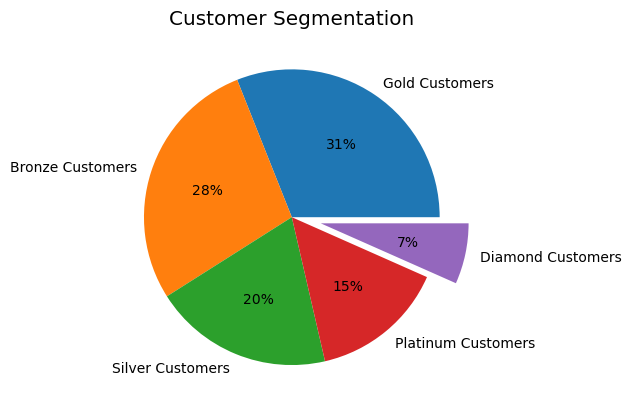

In [25]:
d=final_result.Customer_Segment.value_counts()
plt.title('Customer Segmentation', fontsize='x-large')
plt.pie(d,labels=d.index,autopct='%.0f%%', explode=[0,0,0,0,0.2])
""""""

Our most valuable customers, **Diamond Customers**, makes up **7%** of our entire customers base. On average, they have purchased 489 times and spent 13,665 USD on average in this evaluate period. Our customers who are at risk of churning, **Bronze Customers**, makes up **28%** of our entire customers base. On average, they made a purchase only 14 times and spent 253 USD within the evaluation period.

### Recommendation
Based on the RFM Group, customers with high recency, high frequency and high monetary values (5,5,5) are valuable customers. They should be targeted with special promotions to keep them active.
Customers with high recency and low frequency value (5,1,X) are new customers. A targeted follow-up may convert them into frequent customers.
Customers with low recency but high monetary value (1,X,5) were once valuable customers. A targeted offer may reactivate them.